# Color-Based Segmentation - Magic Cube Challenge

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

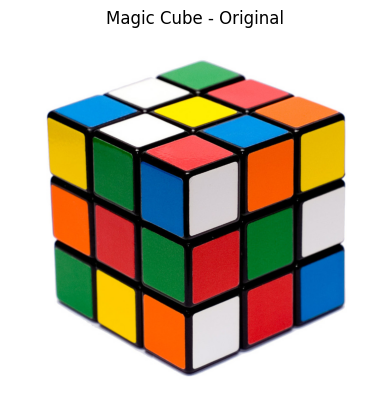

In [2]:
image = cv2.imread('images/magic_cube.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

title = 'Magic Cube'

plt.imshow(image)
plt.title(f'{title} - Original')
plt.axis('off')
plt.show()

## Example 01 - RGB - One Color:

In [3]:
min_color = (0, 10, 90)
max_color = (40, 180, 255)

min = np.array(min_color, dtype='uint8')
max = np.array(max_color, dtype='uint8')

print(f'Min.: {min}', f'Max.: {max}')

Min.: [ 0 10 90] Max.: [ 40 180 255]


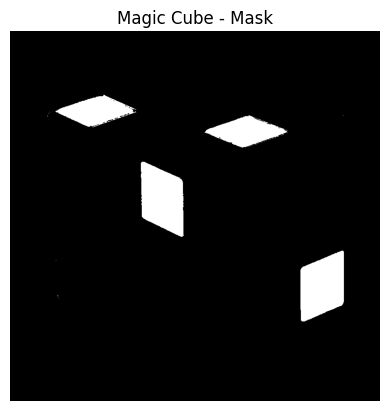

In [4]:
mask_image = cv2.inRange(image, min, max)

plt.imshow(mask_image, cmap='gray')
plt.title(f'{title} - Mask')
plt.axis('off')
plt.show()

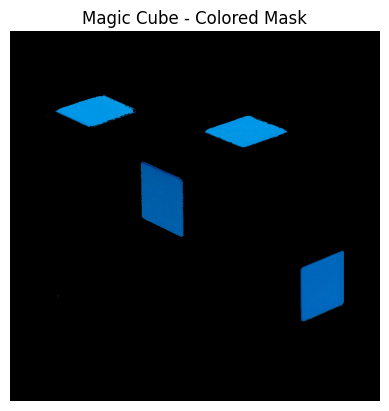

In [5]:
colored_image = cv2.bitwise_and(image, image, mask=mask_image)

plt.imshow(colored_image)
plt.title(f'{title} - Colored Mask')
plt.axis('off')
plt.show()

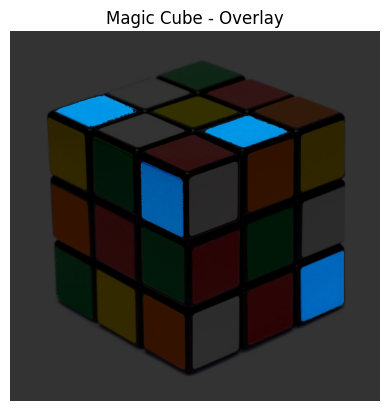

In [6]:
overlay_image = cv2.addWeighted(colored_image, 0.8, image, 0.2, 0)

plt.imshow(overlay_image)
plt.title(f'{title} - Overlay')
plt.axis('off')
plt.show()

## Example 02 - RGB - Two Colors:

In [13]:
colors = np.array([
    [[0, 10, 90], [40, 180, 255]],
    [[200, 150, 0], [255, 255, 10]]
], dtype='uint8')

print(colors)

[[[  0  10  90]
  [ 40 180 255]]

 [[200 150   0]
  [255 255  10]]]


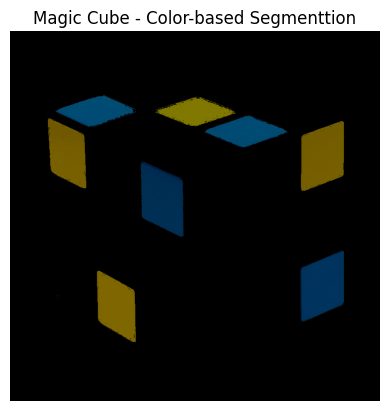

In [22]:
colored_images = []

for color in colors:
    min = color[0]
    max = color[1]

    mask_image = cv2.inRange(image, min, max)
    colored_image = cv2.bitwise_and(image, image, mask=mask_image)
    colored_images.append(colored_image)


color_segmentation = cv2.addWeighted(colored_images[0], 0.5, colored_images[1], 0.5, 0)
plt.imshow(color_segmentation, cmap='gray')
plt.title(f'{title} - Color-based Segmenttion')
plt.axis('off')
plt.show()

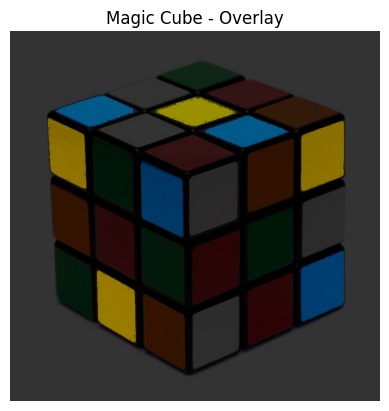

In [20]:
overlay_image = cv2.addWeighted(color_segmentation, 0.8, image, 0.2, 0)

plt.imshow(overlay_image)
plt.title(f'{title} - Overlay')
plt.axis('off')
plt.show()